In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv("completeDataset_inference.csv")

In [5]:
len(df)

1021221

In [3]:
df_hate = df[df['model_inference'] == 'hate']

In [6]:
len(df_hate)

58195

In [4]:
df_hate.head()

,Date,Tweet Treated,Tweet Raw,Url,Id,index,model_inference,normal_score,hate_speech_score
11,2022-01-01 23:57:53+00:00,oh boy.... so russia is like an ape with an a...,@MavkaSlavka Oh boy.... So Russia is like an a...,https://twitter.com/wolframstahl/status/147742...,1477428898891812870,11,hate,0.2077,0.7923
19,2022-01-01 23:54:55+00:00,then get the hell out of russia ted. wtaf??? d...,Then get the hell out of Russia Ted. WTAF??? D...,https://twitter.com/pchurch69/status/147742815...,1477428151655583747,19,hate,0.0675,0.9325
28,2022-01-01 23:53:41+00:00,russia destroys the chechen people via,Russia destroys the Chechen people https://t.c...,https://twitter.com/misirbiev59/status/1477427...,1477427843395162115,28,hate,0.0147,0.9854
50,2022-01-01 23:51:35+00:00,russia 🇷🇺 is the definition of based that why...,@OnlyFansPostinL Russia 🇷🇺 is the definition o...,https://twitter.com/theseriousjones/status/147...,1477427313155452928,50,hate,0.1481,0.8519
80,2022-01-01 23:45:04+00:00,"your fact is ""russia collusion"", and aoc is b...","@AdverseReaction Your fact is ""russia collusio...",https://twitter.com/PatriotsOfMars/status/1477...,1477425675359428609,80,hate,0.0844,0.9156


In [18]:
df_hate['Date Trunc'] = df_hate['Date'].apply(lambda dt: dt[:11]+'00:00:00+00:00')

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_4720\1779552200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hate['Date Trunc'] = df_hate['Date'].apply(lambda dt: dt[:11]+'00:00:00+00:00')


In [19]:
cnt = df_hate[['Date Trunc']].groupby(['Date Trunc'])['Date Trunc'].count()

cnt = pd.DataFrame({'date':cnt.index, 'cnt':cnt.values})

<Axes: xlabel='date', ylabel='cnt'>

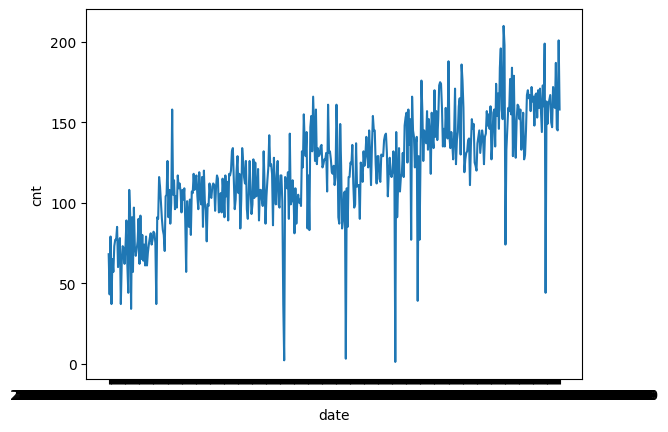

In [20]:
import seaborn as sns

sns.lineplot(data=cnt, x='date', y='cnt')

In [25]:
df_hate['Date Trunc'] = df_hate['Date'].apply(lambda dt: dt[:13]+'00:00+00:00')

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_4720\1593745081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hate['Date Trunc'] = df_hate['Date'].apply(lambda dt: dt[:13]+'00:00+00:00')


In [27]:
cnt = df_hate[['Date Trunc']].groupby(['Date Trunc'])['Date Trunc'].count()

cnt = pd.DataFrame({'date':cnt.index, 'cnt':cnt.values})

<Axes: xlabel='date', ylabel='cnt'>

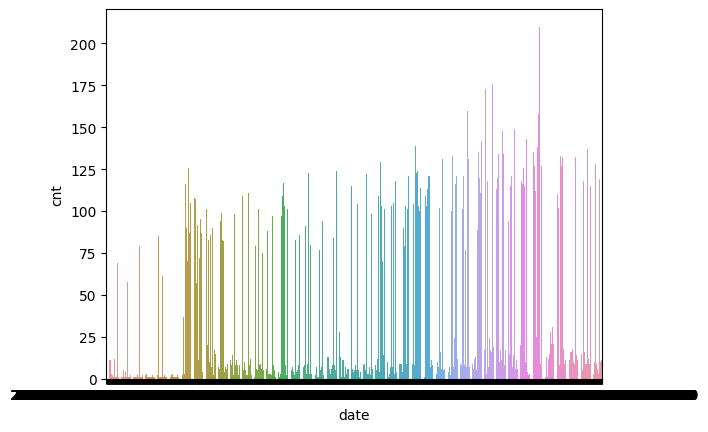

In [28]:
sns.barplot(data=cnt, x='date', y='cnt')